In [1]:
!pip install kmodes

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.preprocessing import OneHotEncoder

In [3]:
jobs=pd.read_csv('jobs_naukri_1.csv', error_bad_lines=False,sep=',')
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [4]:
jobs.isnull().any().sum()

9

In [5]:
jobs.isnull().sum().sort_values(ascending=False)

Role Category              2149
Key Skills                 1243
Role                        790
Location                    473
Job Title                   471
Job Experience Required     469
Functional Area             469
Industry                    469
Job Salary                   51
Uniq Id                       0
Crawl Timestamp               0
dtype: int64

In [6]:
jobs.shape

(29786, 11)

In [7]:
jobs.values

array([['9be62c49a0b7ebe982a4af1edaa7bc5f', '2019-07-05 01:46:07 +0000',
        'Digital Media Planner', ...,
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management',
        'Media Planning Executive/Manager'],
       ['3c52d436e39f596b22519da2612f6a56', '2019-07-06 08:04:50 +0000',
        'Online Bidding Executive', ...,
        'Sales , Retail , Business Development',
        'IT-Software, Software Services', 'Sales Executive/Officer'],
       ['ffad8a2396c60be2bf6d0e2ff47c58d4', '2019-08-05 15:50:44 +0000',
        'Trainee Research/ Research Executive- Hi- Tech Operations', ...,
        'Engineering Design , R&D', 'Recruitment, Staffing',
        'R&D Executive'],
       ...,
       ['43d5b806b26ed99d3ebfc8f366b4cdd1', '2019-08-05 09:41:29 +0000',
        'Assoc. Prof.- CS', ...,
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training', 'Lecturer/Professor'],
       ['8bc87d14cf56564f16

In [8]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [9]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29786 entries, 0 to 29785
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  29786 non-null  object
 1   Crawl Timestamp          29786 non-null  object
 2   Job Title                29315 non-null  object
 3   Job Salary               29735 non-null  object
 4   Job Experience Required  29317 non-null  object
 5   Key Skills               28543 non-null  object
 6   Role Category            27637 non-null  object
 7   Location                 29313 non-null  object
 8   Functional Area          29317 non-null  object
 9   Industry                 29317 non-null  object
 10  Role                     28996 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [10]:
jobs['Role Category']

0                                       Advertising
1                                      Retail Sales
2                                               R&D
3        Admin/Maintenance/Security/Datawarehousing
4                              Programming & Design
                            ...                    
29781                          Programming & Design
29782                                    Operations
29783                              University Level
29784                          Programming & Design
29785                      Online/Digital Marketing
Name: Role Category, Length: 29786, dtype: object

In [11]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'Uniq Id' has '29786'uniques categories
Feature 'Crawl Timestamp' has '28670'uniques categories
Feature 'Job Title' has '23587'uniques categories
Feature 'Job Salary' has '1225'uniques categories
Feature 'Job Experience Required' has '255'uniques categories
Feature 'Key Skills' has '26730'uniques categories
Feature 'Role Category' has '181'uniques categories
Feature 'Location' has '2558'uniques categories
Feature 'Functional Area' has '65'uniques categories
Feature 'Industry' has '115'uniques categories
Feature 'Role' has '624'uniques categories


In [12]:
print(jobs['Role Category'].value_counts())

Programming & Design                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [13]:
jobs_enhanced=jobs['Role Category'].value_counts()>=20

In [14]:
jobs_enhanced.head()

Programming & Design                          True
Voice                                         True
Retail Sales                                  True
HR/ Recruitment / IR                          True
Admin/Maintenance/Security/Datawarehousing    True
Name: Role Category, dtype: bool

In [15]:
jobs_enhanced[jobs_enhanced].shape

(65,)

In [16]:
roles=jobs_enhanced[jobs_enhanced].index

In [17]:
roles

Index(['Programming & Design', 'Voice', 'Retail Sales', 'HR/ Recruitment / IR',
       'Admin/Maintenance/Security/Datawarehousing', 'Accounts',
       'Senior Management', 'Other', 'Corporate Sales',
       'Production/Manufacturing/Maintenance',
       'System Design/Implementation/ERP/CRM', 'Marketing',
       'Medical Professional', 'Creative', 'Engineering Design',
       'Finance/Audit', 'Teachers', 'Project Management', 'University Level',
       'Back Office/Web/Transaction Processing', 'Institutional Sales',
       'Site Engineering', 'Retail/Personal Banking', 'Channel Sales',
       'Analytics & BI', 'R&D', 'Content Development',
       'Purchase/Material Management', 'Operations', 'Food & Beverage',
       'Sales Support', 'Administration/Facility Management', 'Logistics',
       'Advertising', 'Online/Digital Marketing',
       'Corporate Planning/Consulting/Strategy', 'QA/Testing/Documentation',
       'Ticketing/Travel/Documentation', 'Technical Support',
       'Operati

In [18]:
jobs=jobs[jobs['Role Category'].isin(roles)]

In [19]:
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [20]:
jobs.shape

(27355, 11)

In [21]:
print(jobs['Role Category'].value_counts())

Programming & Design                          8549
Voice                                         2385
Retail Sales                                  2359
HR/ Recruitment / IR                          1133
Admin/Maintenance/Security/Datawarehousing     924
                                              ... 
Public Relations                                24
Production/Technical                            24
General Insurance                               23
Housekeeping                                    21
After Sales Service                             20
Name: Role Category, Length: 65, dtype: int64


In [22]:
roles_enhanced=jobs['Industry'].value_counts()>=20

In [23]:
roles_enhanced

IT-Software, Software Services           True
Recruitment, Staffing                    True
BPO, Call Centre, ITeS                   True
Banking, Financial Services, Broking     True
Education, Teaching, Training            True
                                        ...  
Gems / Jewellery                        False
Heat Ventilation / Air Conditioning     False
Architecture / Interior Design          False
Glass / Glassware                       False
Export / Import                         False
Name: Industry, Length: 100, dtype: bool

In [24]:
roles_enhanced[roles_enhanced].shape

(63,)

In [25]:
industry=roles_enhanced[roles_enhanced].index

In [26]:
print(pd.get_dummies(jobs['Industry']).head(5))

   Accounting / Finance  Accounting, Finance  \
0                     0                    0   
1                     0                    0   
2                     0                    0   
3                     0                    0   
4                     0                    0   

   Advertising / PR / MR / Event Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Advertising, PR, MR, Event Management  Agriculture / Dairy  \
0                                      1                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   

   Agriculture, Dairy  Animation, Gam

In [27]:
industry

Index(['IT-Software, Software Services', 'Recruitment, Staffing',
       'BPO, Call Centre, ITeS', 'Banking, Financial Services, Broking',
       'Education, Teaching, Training', 'IT-Software / Software Services',
       'Medical, Healthcare, Hospitals', 'Internet, Ecommerce',
       'Construction, Engineering, Cement, Metals',
       'Strategy, Management Consulting Firms',
       'Travel , Hotels , Restaurants , Airlines , Railways',
       'Automobile, Auto Anciliary, Auto Components',
       'Pharma, Biotech, Clinical Research', 'Media, Entertainment, Internet',
       'Industrial Products, Heavy Machinery',
       'Advertising, PR, MR, Event Management', 'Insurance',
       'Real Estate, Property', 'Accounting, Finance', 'Retail, Wholesale',
       'FMCG, Foods, Beverage', 'Oil and Gas, Energy, Power, Infrastructure',
       'Telcom, ISP', 'IT-Hardware & Networking', 'KPO, Research, Analytics',
       'Other', 'Semiconductors, Electronics',
       'Courier, Transportation, Freight

In [28]:
jobs=jobs[jobs['Industry'].isin(industry)]

In [29]:
jobs.shape

(27087, 11)

In [30]:
print(jobs['Industry'].value_counts())

IT-Software, Software Services          9818
Recruitment, Staffing                   2640
BPO, Call Centre, ITeS                  1711
Banking, Financial Services, Broking    1569
Education, Teaching, Training           1043
                                        ... 
Medical Devices / Equipments              23
Food Processing                           22
Recruitment / Staffing                    22
Legal                                     20
Education / Teaching / Training           20
Name: Industry, Length: 63, dtype: int64


In [31]:
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [32]:
role_wise_job=jobs.groupby(['Role Category']).size().reset_index(name='diff_roles').sort_values('diff_roles',ascending=False)

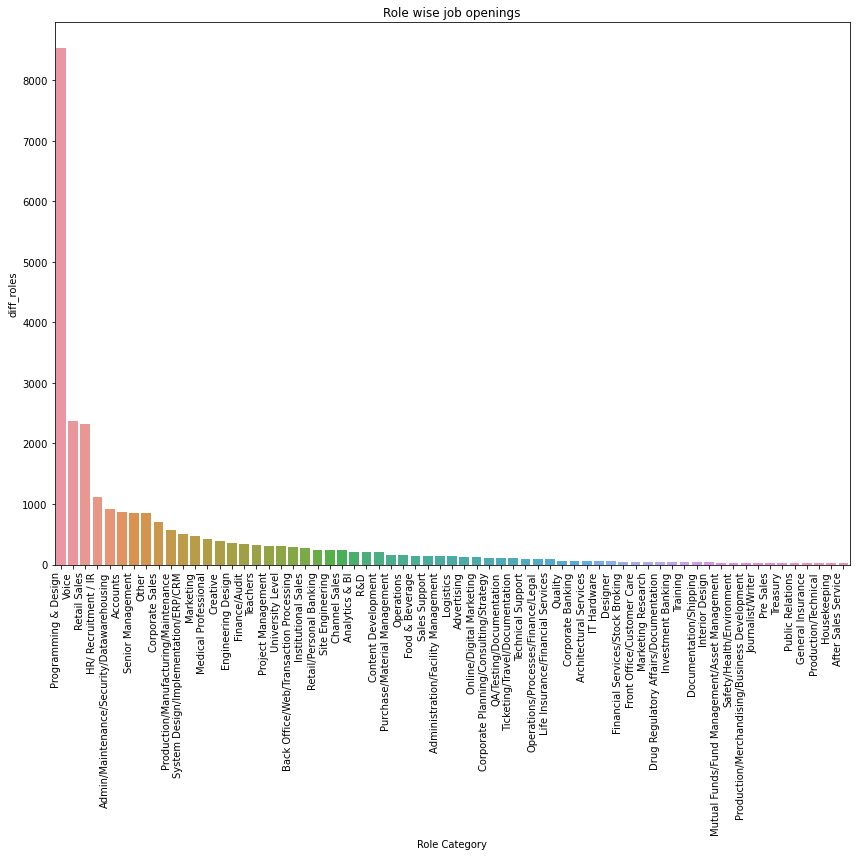

In [33]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x="Role Category", y="diff_roles", data=role_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax.set_title('Role wise job openings')
plt.tight_layout()
plt.show()

In [34]:
industry_wise_job=jobs.groupby(['Industry']).size().reset_index(name='ind_roles').sort_values('ind_roles',ascending=False)

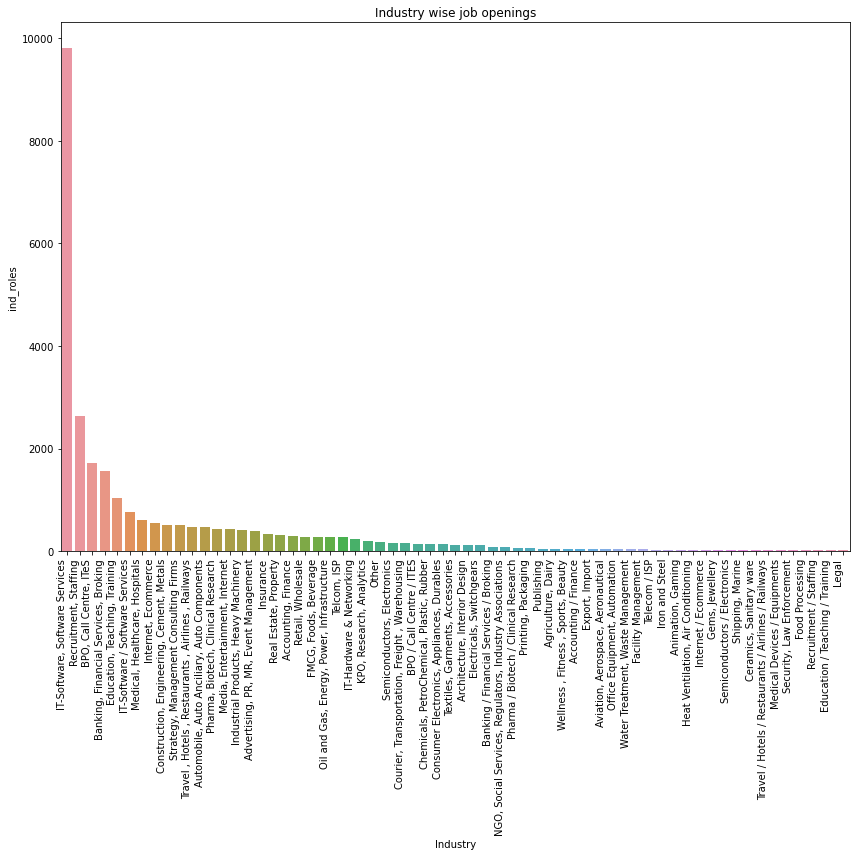

In [35]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x="Industry", y="ind_roles", data=industry_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax.set_title('Industry wise job openings')
plt.tight_layout()
plt.show()

In [36]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '27087'uniques categories
Feature 'Crawl Timestamp' has '26145'uniques categories
Feature 'Job Title' has '21679'uniques categories
Feature 'Job Salary' has '980'uniques categories
Feature 'Job Experience Required' has '243'uniques categories
Feature 'Key Skills' has '24732'uniques categories
Feature 'Role Category' has '65'uniques categories
Feature 'Location' has '2398'uniques categories
Feature 'Functional Area' has '43'uniques categories
Feature 'Industry' has '63'uniques categories
Feature 'Role' has '477'uniques categories


In [37]:
jobs.isnull().any().sum()

3

In [38]:
jobs.isnull().sum().sort_values(ascending=False)

Key Skills                 670
Job Title                    2
Job Salary                   2
Uniq Id                      0
Crawl Timestamp              0
Job Experience Required      0
Role Category                0
Location                     0
Functional Area              0
Industry                     0
Role                         0
dtype: int64

In [39]:
jobs['Role Category'].isnull().any().sum()

0

In [40]:
jobs_for_predict=jobs[['Role Category',
       'Functional Area', 'Industry']]

In [41]:
jobs_for_predict.head()

,Role Category,Functional Area,Industry
0,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management"
1,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services"
2,R&D,"Engineering Design , R&D","Recruitment, Staffing"
3,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services"
4,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services"


In [42]:
mark_array=jobs_for_predict.values
mark_array

array([['Advertising',
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management'],
       ['Retail Sales', 'Sales , Retail , Business Development',
        'IT-Software, Software Services'],
       ['R&D', 'Engineering Design , R&D', 'Recruitment, Staffing'],
       ...,
       ['University Level',
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training'],
       ['Programming & Design',
        'IT Software - Application Programming , Maintenance',
        'IT-Software, Software Services'],
       ['Online/Digital Marketing',
        'Marketing , Advertising , MR , PR , Media Planning',
        'IT-Software, Software Services']], dtype=object)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 55539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 55539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 55539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 55539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 55539.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1372, cost: 49218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 235, cost: 51737.0
Init: initializing centroids
Init: initializing clusters
Starting iter

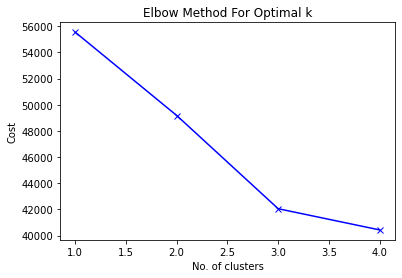

In [43]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(mark_array)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
# Building the model with 30 clusters
kmode = KModes(n_clusters=30, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(mark_array)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3855, cost: 23824.0
Run 1, iteration: 2/100, moves: 328, cost: 23824.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5501, cost: 26743.0
Run 2, iteration: 2/100, moves: 208, cost: 26743.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2763, cost: 24235.0
Run 3, iteration: 2/100, moves: 338, cost: 24235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5558, cost: 25199.0
Run 4, iteration: 2/100, moves: 474, cost: 25199.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4353, cost: 24822.0
Run 5, iteration: 2/100, moves: 64, cost: 24822.0
Best run was number 1


array([19,  3,  1, ..., 21, 11, 19], dtype=uint16)

In [44]:
jobs.insert(0, "Cluster", clusters, True)
jobs

,Cluster,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,19,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,1,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,15,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,25,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
29781,2,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
29782,6,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servic...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
29783,21,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
29784,11,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life C...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


In [46]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '27087'uniques categories
Feature 'Crawl Timestamp' has '26145'uniques categories
Feature 'Job Title' has '21679'uniques categories
Feature 'Job Salary' has '980'uniques categories
Feature 'Job Experience Required' has '243'uniques categories
Feature 'Key Skills' has '24732'uniques categories
Feature 'Role Category' has '65'uniques categories
Feature 'Location' has '2398'uniques categories
Feature 'Functional Area' has '43'uniques categories
Feature 'Industry' has '63'uniques categories
Feature 'Role' has '477'uniques categories


In [45]:
dataTypeSeries = jobs.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Cluster                    uint16
Uniq Id                    object
Crawl Timestamp            object
Job Title                  object
Job Salary                 object
Job Experience Required    object
Key Skills                 object
Role Category              object
Location                   object
Functional Area            object
Industry                   object
Role                       object
dtype: object


In [46]:
jobs[jobs['Cluster']==27].head()

,Cluster,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
22,27,498a81dbb1966dc3b032dcd54dea2e61,2019-07-05 02:39:32 +0000,QA Executive,"2,00,000 - 3,00,000 PA.",2 - 5 yrs,QA Executive,QA/Testing/Documentation,Hyderabad,IT Software - QA & Testing,"Pharma, Biotech, Clinical Research",Quality Assurance/Quality Control Executive
32,27,36b432841127f2445623ccff69694736,2019-08-04 13:21:23 +0000,Senior Executive- Contract Logistics- Bom WP-A,Not Disclosed by Recruiter,2 - 5 yrs,Administration| Administrative Support| Contra...,Logistics,Mumbai,Purchase / Logistics / Supply Chain,"Courier, Transportation, Freight , Warehousing",Logistics Executive
2188,27,72feec3e1473c3672c4cca76a54d601d,2019-08-04 22:03:17 +0000,Senior Manager - Last Mile ( Logistics Operati...,"14,00,000 - 22,50,000 PA.",5 - 9 yrs,supply chain| logistics| Supply Chain Manageme...,Logistics,Mumbai,Purchase / Logistics / Supply Chain,"Courier, Transportation, Freight , Warehousing",Logistics Manager
2628,27,c949f416aa0c0f816ec760d43f4bd06e,2019-07-05 03:10:16 +0000,Business Development Manager/ Manager,Not Disclosed by Recruiter,4 - 5 yrs,data analysis| Customer Service| Help Desk| In...,Documentation/Shipping,Ahmedabad,"Export , Import , Merchandising","Courier, Transportation, Freight , Warehousing",Documentation/Shipping-Executive/Manager
2979,27,a57add4a2813fab75ef46703badaa1e2,2019-07-05 18:08:27 +0000,QA Engineer,Not Disclosed by Recruiter,3 - 8 yrs,Computer science| Functional testing| Shell sc...,QA/Testing/Documentation,Hyderabad,IT Software - QA & Testing,"Courier, Transportation, Freight , Warehousing",Quality Assurance/Quality Control Executive


In [47]:
jobs = jobs[['Cluster','Job Experience Required','Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role']]
jobs.head()

,Cluster,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,19,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,1,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,15,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,25,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [48]:
X = jobs.iloc[:,:-1]
y = jobs.iloc[:,7]

In [49]:
X

,Cluster,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry
0,19,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management"
1,3,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services"
2,1,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing"
3,15,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services"
4,25,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services"
...,...,...,...,...,...,...,...
29781,2,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics"
29782,6,1 - 5 yrs,Service delivery| LMS| CRE| Integration servic...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training"
29783,21,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training"
29784,11,5 - 10 yrs,Security Analysis| Software Development Life C...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services"


In [50]:
y

0                  Media Planning Executive/Manager
1                           Sales Executive/Officer
2                                     R&D Executive
3                        Technical Support Engineer
4                                  Testing Engineer
                            ...                    
29781                            Software Developer
29782                            Operations Manager
29783                            Lecturer/Professor
29784                            Software Developer
29785    Search Engine Optimisation /SEO Specialist
Name: Role, Length: 27087, dtype: object

In [51]:
X['Role Category'].unique()

array(['Advertising', 'Retail Sales', 'R&D',
       'Admin/Maintenance/Security/Datawarehousing',
       'Programming & Design', 'Institutional Sales', 'Voice',
       'Corporate Planning/Consulting/Strategy', 'Operations',
       'Online/Digital Marketing', 'Engineering Design', 'Accounts',
       'Retail/Personal Banking', 'QA/Testing/Documentation',
       'Project Management', 'Logistics', 'Technical Support',
       'Senior Management', 'Content Development', 'HR/ Recruitment / IR',
       'Corporate Sales', 'Architectural Services',
       'Front Office/Customer Care',
       'Production/Manufacturing/Maintenance', 'Creative',
       'Channel Sales', 'Sales Support',
       'System Design/Implementation/ERP/CRM',
       'Back Office/Web/Transaction Processing', 'Quality',
       'Analytics & BI', 'Other', 'Finance/Audit', 'Public Relations',
       'University Level', 'Drug Regulatory Affairs/Documentation',
       'Teachers', 'Food & Beverage',
       'Production/Merchandising/B

In [52]:
X['Functional Area'].unique()

array(['Marketing , Advertising , MR , PR , Media Planning',
       'Sales , Retail , Business Development',
       'Engineering Design , R&D',
       'IT Software - Application Programming , Maintenance',
       'IT Software - QA & Testing',
       'ITES , BPO , KPO , LPO , Customer Service , Operations',
       'Strategy , Management Consulting , Corporate Planning',
       'IT Software - eCommerce , Internet Technologies',
       'Accounts , Finance , Tax , Company Secretary , Audit',
       'Financial Services , Banking , Investments , Insurance',
       'IT Software - DBA , Datawarehousing',
       'IT Software - Network Administration , Security',
       'Purchase / Logistics / Supply Chain',
       'IT Hardware , Technical Support , Telecom Engineering',
       'IT Software - Mobile', 'Journalism , Editing , Content',
       'HR , Recruitment , Administration , IR',
       'Architecture , Interior Design', 'IT Software - Other',
       'IT Software - Embedded , EDA , VLSI , ASIC

In [53]:
X['Location'].unique()

array(['Mumbai', 'Pune,Pune', 'Gurgaon', ...,
       'Delhi NCR (New Friends Colony)', 'Bengaluru,Bhubaneshwar',
       'Howrah'], dtype=object)

In [54]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()

X['Key Skills']= label_encoder.fit_transform(X['Key Skills'])
 
X['Key Skills'].unique()

array([10120, 22639,  3985, ..., 14922, 14781, 11936])

In [55]:
label_encoder = preprocessing.LabelEncoder()

X['Role Category']= label_encoder.fit_transform(X['Role Category'])
 
X['Role Category'].unique()

array([ 3, 51, 50,  1, 44, 26, 64, 11, 37, 36, 17,  0, 52, 48, 45, 31, 59,
       55,  9, 23, 12,  6, 21, 41, 13,  8, 54, 57,  7, 49,  5, 39, 18, 46,
       63, 16, 58, 20, 42,  2, 47, 61, 34, 29, 32, 22, 53, 60, 56, 24, 40,
       28, 35, 19, 15, 27, 33, 30, 10, 14, 43,  4, 38, 25, 62])

In [56]:
label_encoder = preprocessing.LabelEncoder()

X['Location']= label_encoder.fit_transform(X['Location'])
 
X['Location'].unique()

array([1768, 2320, 1347, ...,  915,  376, 1435])

In [57]:
label_encoder = preprocessing.LabelEncoder()

X['Functional Area']= label_encoder.fit_transform(X['Functional Area'])
 
X['Functional Area'].unique()

array([32, 36,  6, 14, 24, 29, 38, 28,  0, 10, 16, 22, 35, 13, 21, 30, 11,
        2, 23, 18, 12, 34,  5,  1, 41, 33, 25,  8, 27, 17, 39, 37, 42, 31,
       26, 15,  9, 40,  7, 20, 19,  3,  4])

In [58]:
label_encoder = preprocessing.LabelEncoder()

X['Industry']= label_encoder.fit_transform(X['Industry'])
 
X['Industry'].unique()

array([ 2, 28, 49, 47, 16,  9, 27, 29, 58, 30, 44,  4, 21, 51, 55, 32, 18,
       36,  7, 56, 59, 41, 11, 14,  5, 38, 10, 62, 42, 57, 33, 17, 15,  6,
        1, 53, 19,  0,  8, 20, 26, 45, 50, 13, 46, 34, 43, 22,  3, 25, 23,
       39, 40, 35, 60, 52, 54, 24, 12, 61, 48, 37, 31])

In [59]:
label_encoder = preprocessing.LabelEncoder()

X['Job Experience Required']= label_encoder.fit_transform(X['Job Experience Required'])
 
X['Job Experience Required'].unique()

array([188, 144,   2,  13, 195,   0, 241, 148,  28,  30, 171, 142, 172,
         9,  11, 207, 186, 168, 215, 223, 140, 114,  44, 147,  26, 170,
        42, 197, 174, 201,  24,   6,  22, 166, 203, 184, 182, 146,  81,
       227, 116,  23, 229,  36, 194, 178, 187,  40, 180, 141, 185,  73,
        82, 143, 179, 202, 173, 181,  46, 211, 199,  75, 209,  69,   5,
        51, 130, 155, 111, 226,  71, 133, 167, 110,   1,  10, 100, 213,
       219, 177,  78, 208, 214, 225, 228, 127,  87,   8,  27, 105,  48,
       145, 205, 196, 221,  56, 119, 193,  38,  41, 200,  18, 237, 121,
       136, 222, 153, 239, 210, 169,  12, 135, 236, 149,  96, 232,  15,
       107, 132, 240,  67,  16, 156, 138, 112,  21,  85, 158,  32, 183,
       120,  79, 212, 230, 216,  54,  35,  25,  65,  99,  88, 154, 104,
       192,  29,  63, 106, 115,  49, 102, 103, 206,  20, 204, 163,  98,
       235, 234, 152,  31,  68, 198,  19, 125,  91, 131, 101,  37, 129,
       139,  55,  60, 164,  76, 113, 242,  47,  53,  14, 160,  8

In [60]:
X.head()

,Cluster,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry
0,19,188,10120,3,1768,32,2
1,3,144,22639,51,2320,36,28
2,1,2,3985,50,1347,6,49
3,15,13,16100,1,1768,14,28
4,25,144,21757,44,1438,24,28


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 30))

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [67]:
print(X_train)

[[25.86206897 23.15352697  1.81366008 ...  3.04130163 17.14285714
  13.5483871 ]
 [26.89655172 18.42323651 14.86352056 ... 27.40926158 22.85714286
  13.5483871 ]
 [11.37931034 10.33195021  1.72510008 ...  3.04130163 10.
  13.5483871 ]
 ...
 [ 9.31034483 30.         10.74608759 ... 27.40926158 11.42857143
  13.5483871 ]
 [ 3.10344828 26.26556017 14.81256824 ...  3.04130163 25.71428571
   8.70967742]
 [ 2.06896552 21.65975104 15.17893971 ... 10.43804756 10.
  15.48387097]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest= RandomForestClassifier(max_depth=10,random_state=0,criterion ='entropy')
rforest.fit(X_train, y_train)

In [ ]:
predictions = rforest.predict(X_test)
predictions

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print(acc)